In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ultralytics
from IPython.display import Image
from ultralytics import YOLO

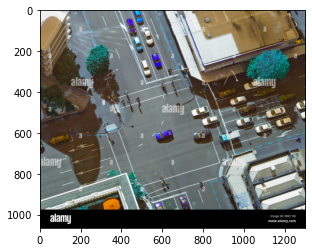

In [74]:
# read image
img = cv2.imread("image/img2.jpg")
img_mask2 = cv2.imread("image/img2_mask.jpg")
plt.imshow(img)

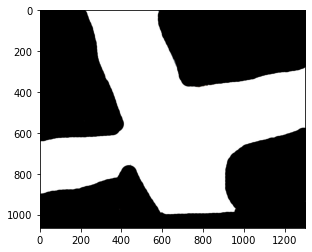

In [75]:
plt.imshow(img_mask2)

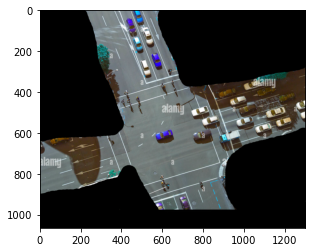

In [76]:
# phép bitwise and
img_mask = cv2.bitwise_and(img, img_mask2)
plt.imshow(img_mask)

(1065, 1300, 3)
Diện tích vùng pixel lớn nhất: 644130.0 pixel


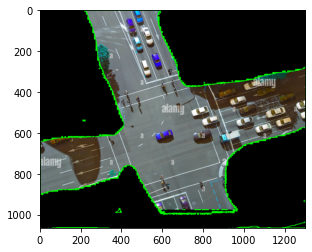

In [77]:
# tìm contours của img_mask
temp = img_mask.copy()
print(temp.shape)
gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# vẽ contours và tính diện tích contours lớn nhất
area = 0
for c in contours:
    cv2.drawContours(temp, [c], -1, (0, 255, 0), 2)
    area = max(cv2.contourArea(c), area)
# in kết quả
print(f"Diện tích vùng pixel lớn nhất: {area} pixel")
plt.imshow(temp)

In [78]:
img_mask2_ = img_mask2.resize((544, 640))
area= np.count_nonzero(img_mask2)//3
print(area)

30640


In [79]:
img_mask2.shape

(544, 640)


0: 544x640 3 persons, 11 cars, 5 traffic lights, 1 cell phone, 312.2ms
Speed: 8.0ms preprocess, 312.2ms inference, 23.9ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs\segment\predict47


total: 8876 pixel
Số xe chiếm: 28.97 % lòng đường
Số lượng xe: 11


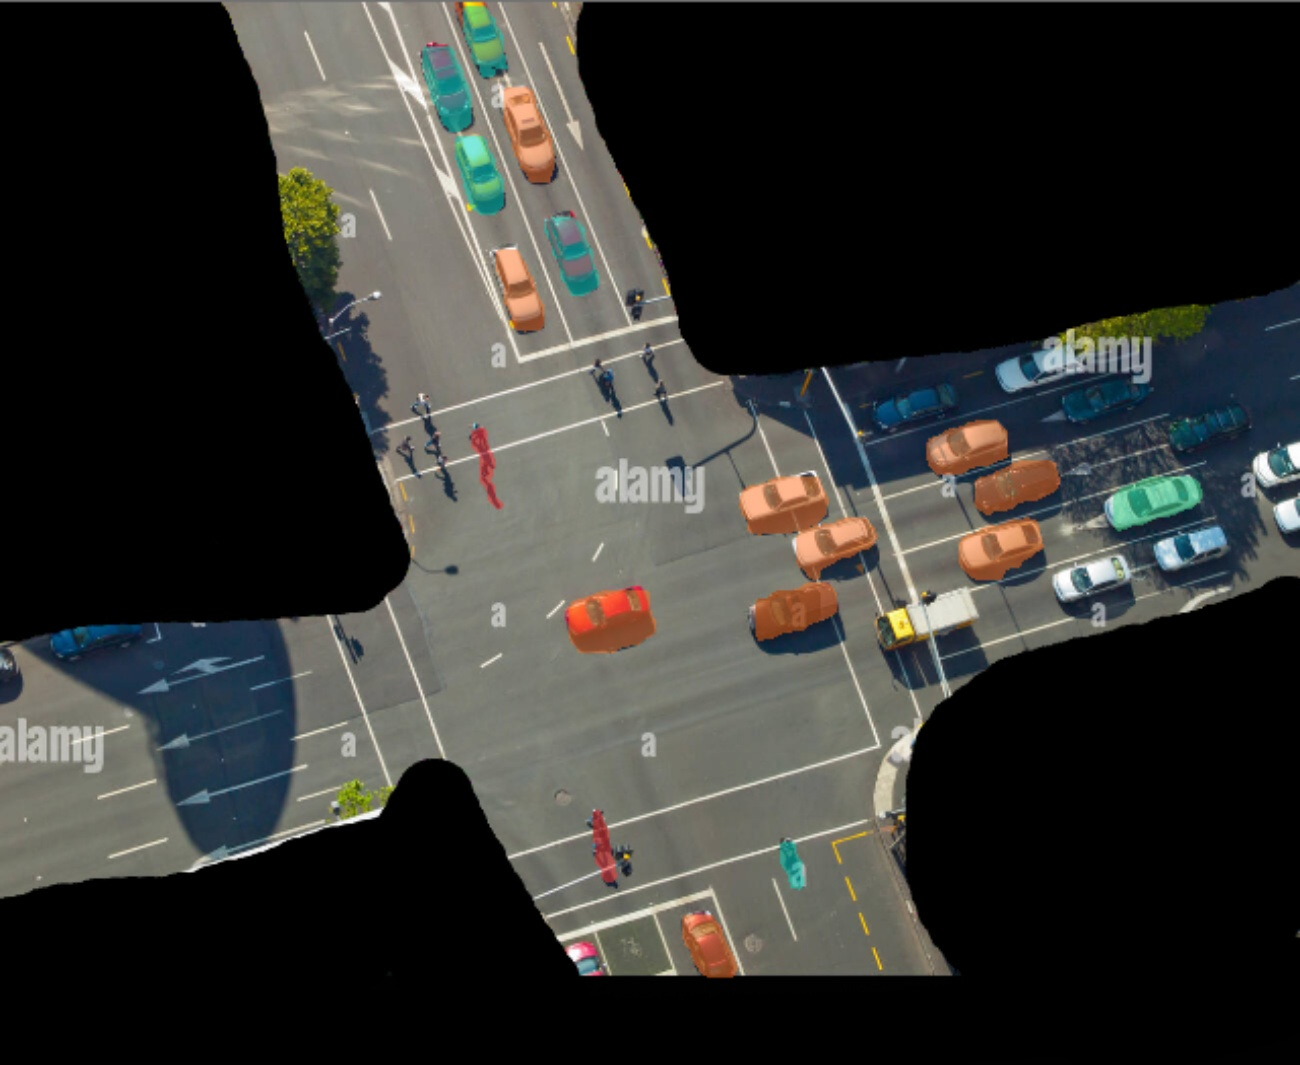

In [80]:
model = YOLO('yolov8s-seg.pt')  # set model
results = model.predict(source=img_mask, save=True, boxes = False, conf = 0.15)  # predict() returns a named tuple

names = model.names
list = ["car", "truck", "bus"]
Sum_area = 0
num_car = 0
# print(results[0].boxes.cls)
for i in range(len(results[0].masks)):
    if names[int(results[0].boxes.cls[i])] in list:
        Sum_area += np.count_nonzero(results[0].masks.data[i])
        num_car += 1

print("total: {} pixel".format(Sum_area))
print("Số xe chiếm: {} % lòng đường".format(np.round(Sum_area/area*100, 2)))
print('Số lượng xe: {}'.format(num_car))
Image(f'{results[0].save_dir}\image0.jpg')

In [81]:
results[0].masks.masks

WARNING  'Masks.masks' is deprecated. Use 'Masks.data' instead.


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [82]:
results[0].boxes.boxes.shape

WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


torch.Size([20, 6])

In [83]:
results[0].boxes.cls

tensor([ 2.,  2.,  2.,  9.,  2., 67.,  2.,  2.,  2.,  2.,  2.,  9.,  9.,  2.,  0.,  0.,  0.,  2.,  9.,  9.])

In [84]:
masks = results[0].masks.data
boxes = results[0].boxes.data

clss = boxes[:, 5]

In [85]:
clss

tensor([ 2.,  2.,  2.,  9.,  2., 67.,  2.,  2.,  2.,  2.,  2.,  9.,  9.,  2.,  0.,  0.,  0.,  2.,  9.,  9.])

In [86]:
import torch
indices = torch.where(clss == 2)
print(indices)

(tensor([ 0,  1,  2,  4,  6,  7,  8,  9, 10, 13, 17]),)


In [87]:
indices_ = torch.where(clss == 9)
print(indices_)

(tensor([ 3, 11, 12, 18, 19]),)


In [88]:
car_masks = masks[indices]
bus_mask = masks[indices_]
print(car_masks.shape)
print(bus_mask.shape)

torch.Size([11, 544, 640])
torch.Size([5, 544, 640])


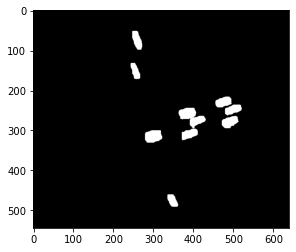

In [89]:
people_mask = torch.any(car_masks, dim=0).int() * 255
plt.imshow(people_mask.cpu().numpy(), cmap='gray')
# people_mask.shape

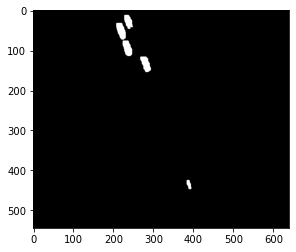

In [90]:
bus_mask_ = torch.any(bus_mask, dim=0).int() * 255
plt.imshow(bus_mask_.cpu().numpy(), cmap='gray')

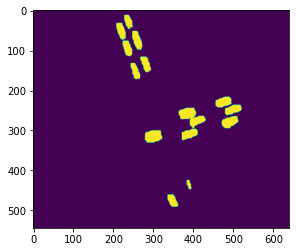

In [91]:
# cộng 2 ảnh people_mask và bus_mask
people_bus_mask = people_mask + bus_mask_
plt.imshow(people_bus_mask)

In [93]:
np.count_nonzero(people_bus_mask) / area

0.36024804177545694

In [69]:
names = model.names
print(names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [71]:
for key, value in names.items():
    if value == 'car' or value == 'truck' or value == 'bus':
        print(key, value)

2 car
5 bus
7 truck
